### Zadanie 4: Zapytania SQL do bazy danych Chinook - część II

W tym zadaniu kontynuujemy odpytywanie bazy Chinook. Tym razem kilka zadań z gwiazdką (bliżej końca).

Struktura tabel bazy Chinook

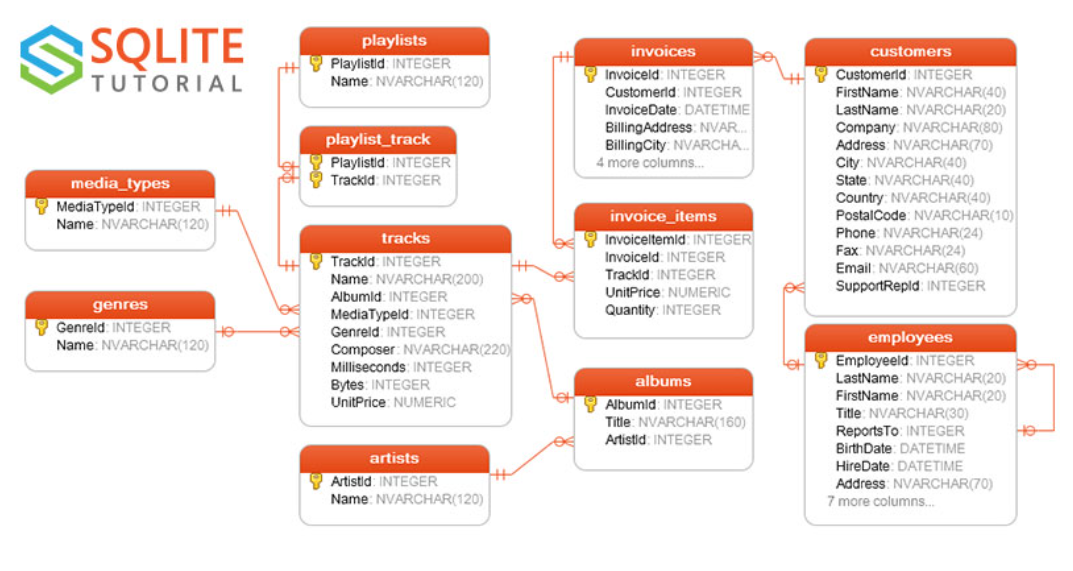

##### A. Wyświetl wszystkie nazwy artystów.

SELECT Name FROM artists;

##### B. Wyświetl wszystkie tytuły albumów.

SELECT Title FROM albums;

##### C. Policz liczbę utworów w bazie danych.

SELECT COUNT(*) FROM tracks;

##### D. Wyświetl tytuły wszystkich albumów wydanych przez artystę o nazwie "Queen".

SELECT albums.Title \
FROM albums \
JOIN artists ON albums.ArtistId = artists.ArtistId \
WHERE artists.Name = 'Queen';

##### E. Wyświetl nazwy wszystkich utworów z albumu "Let There Be Rock".

SELECT tracks.Name \
FROM tracks \
JOIN albums ON tracks.AlbumId = albums.AlbumId \
WHERE albums.Title = 'Let There Be Rock';

##### F. Policz liczbę utworów w każdym gatunku muzycznym.

SELECT genres.Name, COUNT(tracks.TrackId) AS num_tracks \
FROM genres \
JOIN tracks ON genres.GenreId = tracks.GenreId \
GROUP BY genres.Name;

##### G. Wyświetl średnią długość utworów (w sekundach) w każdym gatunku muzycznym.

SELECT genres.Name, AVG(tracks.Milliseconds / 1000.0) AS avg_length_seconds \
FROM genres \
JOIN tracks ON genres.GenreId = tracks.GenreId \
GROUP BY genres.Name;

##### H. Wyświetl nazwiska wszystkich klientów.

SELECT LastName FROM customers;

##### I. Policz liczbę klientów w każdym kraju.

SELECT Country, COUNT(CustomerId) AS num_customers \
FROM customers \
GROUP BY Country;

##### J. Wyświetl imiona i nazwiska klientów, którzy złożyli zamówienie o wartości większej niż 20 dolarów.

SELECT customers.FirstName, customers.LastName \
FROM customers \
JOIN invoices ON customers.CustomerId = invoices.CustomerId \
WHERE invoices.Total > 20;

##### K. Policz liczbę utworów skomponowanych przez każdego kompozytora.

SELECT Composer, COUNT(TrackId) AS num_tracks \
FROM tracks \
WHERE Composer IS NOT NULL \
GROUP BY Composer;

##### L. Wyświetl nazwiska i imiona klientów oraz sumę ich zamówień, posortowane według sumy zamówień malejąco.

SELECT customers.LastName, customers.FirstName, SUM(invoices.Total) AS total_spent \
FROM customers \
JOIN invoices ON customers.CustomerId = invoices.CustomerId \
GROUP BY customers.CustomerId \
ORDER BY total_spent DESC;

##### M. Policz średnią długość utworów (w milisekundach) dla każdego albumu.

SELECT albums.Title, AVG(tracks.Milliseconds) AS avg_length \
FROM albums \
JOIN tracks ON albums.AlbumId = tracks.AlbumId \
GROUP BY albums.AlbumId;

##### N. Wyświetl nazwy albumów i liczbę utworów na każdym z nich, sortując wyniki według liczby utworów malejąco.

SELECT albums.Title, COUNT(tracks.TrackId) AS num_tracks \
FROM albums \
JOIN tracks ON albums.AlbumId = tracks.AlbumId \
GROUP BY albums.AlbumId \
ORDER BY num_tracks DESC;

##### O. Wyświetl nazwiska i imiona pracowników oraz liczbę klientów, którym każdy z nich udzielał wsparcia.

SELECT employees.LastName, employees.FirstName, COUNT(customers.CustomerId) AS num_customers \
FROM employees \
JOIN customers ON employees.EmployeeId = customers.SupportRepId \
GROUP BY employees.EmployeeId;

##### P. Wyświetl nazwy utworów i nazwy albumów, z których pochodzą, posortowane według nazw albumów.

SELECT tracks.Name AS track_name, albums.Title AS album_name \
FROM tracks \
JOIN albums ON tracks.AlbumId = albums.AlbumId \
ORDER BY albums.Title;

##### R. Wyświetl nazwy utworów, nazwy albumów oraz nazwiska i imiona artystów, którzy je wykonują.

SELECT tracks.Name AS track_name, albums.Title AS album_name, artists.Name AS artist_name \
FROM tracks \
JOIN albums ON tracks.AlbumId = albums.AlbumId \
JOIN artists ON albums.ArtistId = artists.ArtistId;

##### S. Wyświetl nazwiska i imiona klientów oraz tytuły albumów, które zakupili.

SELECT customers.LastName, customers.FirstName, albums.Title \
FROM customers \
JOIN invoices ON customers.CustomerId = invoices.CustomerId \
JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId \
JOIN tracks ON invoice_items.TrackId = tracks.TrackId \
JOIN albums ON tracks.AlbumId = albums.AlbumId;

##### T. Wyświetl nazwiska i imiona klientów oraz nazwy gatunków muzycznych, które zakupili.

SELECT customers.LastName, customers.FirstName, genres.Name AS genre_name \
FROM customers \
JOIN invoices ON customers.CustomerId = invoices.CustomerId \
JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId \
JOIN tracks ON invoice_items.TrackId = tracks.TrackId \
JOIN genres ON tracks.GenreId = genres.GenreId;

##### U. Policz całkowitą wartość zamówień dla każdego kraju, sortując wyniki według wartości zamówień malejąco.

SELECT customers.Country, SUM(invoices.Total) AS total_spent \
FROM customers \
JOIN invoices ON customers.CustomerId = invoices.CustomerId \
GROUP BY customers.Country \
ORDER BY total_spent DESC;